In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

pca_item_data_short = pd.read_csv('pca_item_data_short.csv', index_col=0)

In [4]:
print( base_df.shape )
print( threshold_item_data.shape )
print( pca_item_data.shape )
print( pca_item_data_short.shape )

(414, 8)
(414, 31)
(414, 130)
(414, 30)


In [5]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

In [6]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

In [7]:
# Join base_df with pca_item_data_short
pca_short_df = base_df.join(pca_item_data_short)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## KMeans on base_df

In [9]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [10]:
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [11]:
base_df['cluster'] = k_means.predict(base_df)
base_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,1
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0


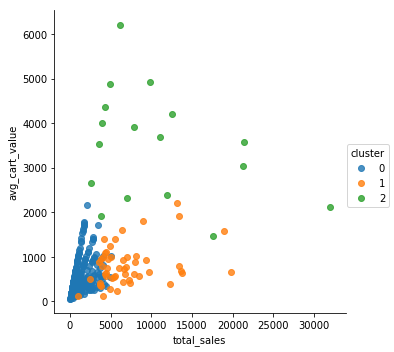

In [12]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)

## KMeans on threshold_df

In [13]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))
k_means.fit(threshold_df)
threshold_df['cluster'] = k_means.predict(threshold_df)
threshold_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,21086,23206,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,...,0,0,0,5,0,0,4,0,0,2
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0,0,...,0,0,0,0,0,0,0,0,4,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,1,0,...,0,0,0,0,1,1,1,1,1,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0,0,...,1,0,0,0,0,0,0,0,1,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0,0,...,0,0,0,1,0,0,2,0,5,0


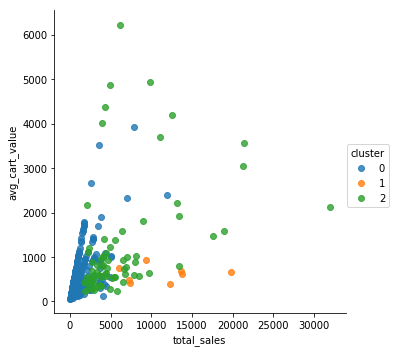

In [14]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

## KMeans on pca_df

In [15]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))
k_means.fit(pca_df)
pca_df['cluster'] = k_means.predict(pca_df)
pca_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876142,4.828928,...,0.620406,-0.257790,0.592536,-0.173065,-0.499284,0.475380,-0.068648,0.236544,0.636234,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219831,1.226259,...,-0.574109,-0.919167,-0.350570,-1.120047,0.742861,-0.875401,-1.138092,0.907499,-0.296269,2
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260838,2.387704,...,1.399162,-3.128503,1.244966,-4.038387,-4.204556,6.178445,1.899059,-5.164789,0.828374,2
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929319,-0.714871,...,0.234113,0.726583,-1.280786,-0.501006,-0.210785,0.495302,-0.739222,-0.212180,1.682187,2
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053117,2.111166,...,6.625053,2.008473,-2.231867,1.640222,-1.397512,-3.820568,-1.148290,-4.764419,-0.856397,2


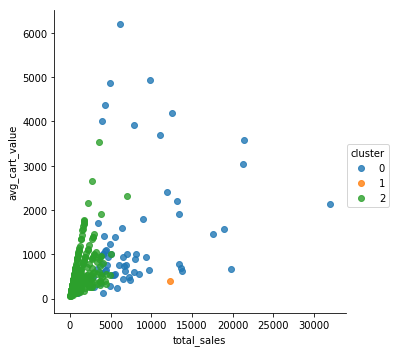

In [16]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

## KMeans on pca_short_df

In [17]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))
k_means.fit(pca_short_df)
pca_short_df['cluster'] = k_means.predict(pca_short_df)
pca_short_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876274,4.831762,...,8.047806,41.283714,-37.394419,-15.629249,7.792009,19.995146,6.662616,-22.762139,-33.688975,2
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219832,1.226449,...,0.037665,0.498985,0.301980,1.333156,-0.678253,-0.069919,1.025139,-0.106025,-0.007098,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260826,2.388205,...,0.428412,-0.685355,1.549563,-1.581893,0.230518,-0.890377,0.940356,0.836539,-1.137101,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929325,-0.714888,...,0.894924,1.358928,0.203494,-0.193021,-0.195534,-0.561222,1.252332,0.051633,-0.183793,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053136,2.110795,...,-0.950596,-2.248489,0.661647,-2.082930,-0.690487,-1.097586,-1.870677,-0.998540,0.555846,0


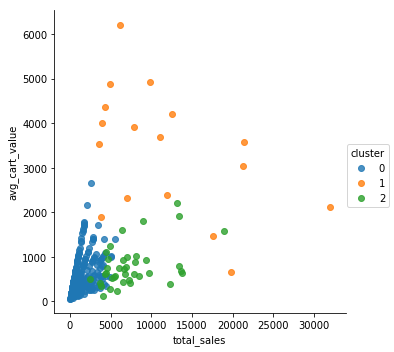

In [18]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_short_df, fit_reg=False)

## Model comparison

In [20]:
from sklearn.metrics import adjusted_rand_score

In [21]:
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.60933195122400741

In [22]:
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.81403352989509081

In [23]:
adjusted_rand_score(base_df.cluster, pca_short_df.cluster)

0.85958129183388643

In [24]:
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.67356165777005061

In [25]:
adjusted_rand_score(threshold_df.cluster, pca_short_df.cluster)

0.57818903209033157

In [26]:
adjusted_rand_score(pca_df.cluster, pca_short_df.cluster)

0.75801604901467257